<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-выборки" data-toc-modified-id="Взвешивание-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание выборки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Импортируем базы:

In [182]:
!pip install sweetviz

In [183]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [184]:
df = pd.read_csv('Churn.csv')

Исследуем базу данных:

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [186]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2911,2912,15704987,Lu,649,France,Female,52,8.0,49113.75,1,1,0,41858.43,0
701,702,15659098,Toscano,669,France,Male,30,7.0,95128.86,1,0,0,19799.26,0
7764,7765,15751177,Milne,685,Germany,Female,44,2.0,119657.53,1,1,0,145387.05,1
8631,8632,15753462,Godson,632,Germany,Male,30,2.0,72549.00,2,0,1,182728.80,0
556,557,15705515,Lazarev,587,Germany,Male,40,5.0,138241.90,2,1,0,159418.10,0
10,11,15767821,Bearce,528,France,Male,31,6.0,102016.72,2,0,0,80181.12,0
5167,5168,15587174,Kerr,726,France,Male,29,7.0,0.00,2,1,1,91844.14,1
2550,2551,15784301,Wang,850,France,Male,42,0.0,0.00,2,1,0,44165.84,0
9661,9662,15742019,Benford,675,France,Female,39,6.0,0.00,2,0,0,83419.15,0
7552,7553,15781574,Ma,636,Spain,Male,76,9.0,126534.60,1,1,1,39789.62,0


**Признаки**
* 		RowNumber — индекс строки в данных
* 		CustomerId — уникальный идентификатор клиента
* 		Surname — фамилия
* 		CreditScore — кредитный рейтинг
* 		Geography — страна проживания
* 		Gender — пол
* 		Age — возраст
* 		Tenure — сколько лет человек является клиентом банка
* 		Balance — баланс на счёте
* 		NumOfProducts — количество продуктов банка, используемых клиентом
* 		HasCrCard — наличие кредитной карты
* 		IsActiveMember — активность клиента
* 		EstimatedSalary — предполагаемая зарплата


**Целевой признак**

Exited — факт ухода клиента

Меняем названия колонок:

In [187]:
old_names = df.columns
new_names = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']
names_dict = dict(zip(old_names, new_names))
df = df.rename(columns=names_dict)

Смортрим наличие явных дубликатов:

In [188]:
df.duplicated().sum()

0

Анализ количественных и дамми переменных:

In [189]:
num_list = ['credit_score', 'age', 'tenure', 'balance', 
        'num_of_products', 'has_cr_card','is_active_member', 'estimated_salary', 'exited']
for x in num_list:
    print(x)
    print(df[x].describe(), '\n')

credit_score
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64 

age
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64 

tenure
count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64 

balance
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64 

num_of_products
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%       

array([[<AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'num_of_products'}>,
        <AxesSubplot:title={'center':'has_cr_card'}>],
       [<AxesSubplot:title={'center':'is_active_member'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>,
        <AxesSubplot:title={'center':'exited'}>]], dtype=object)

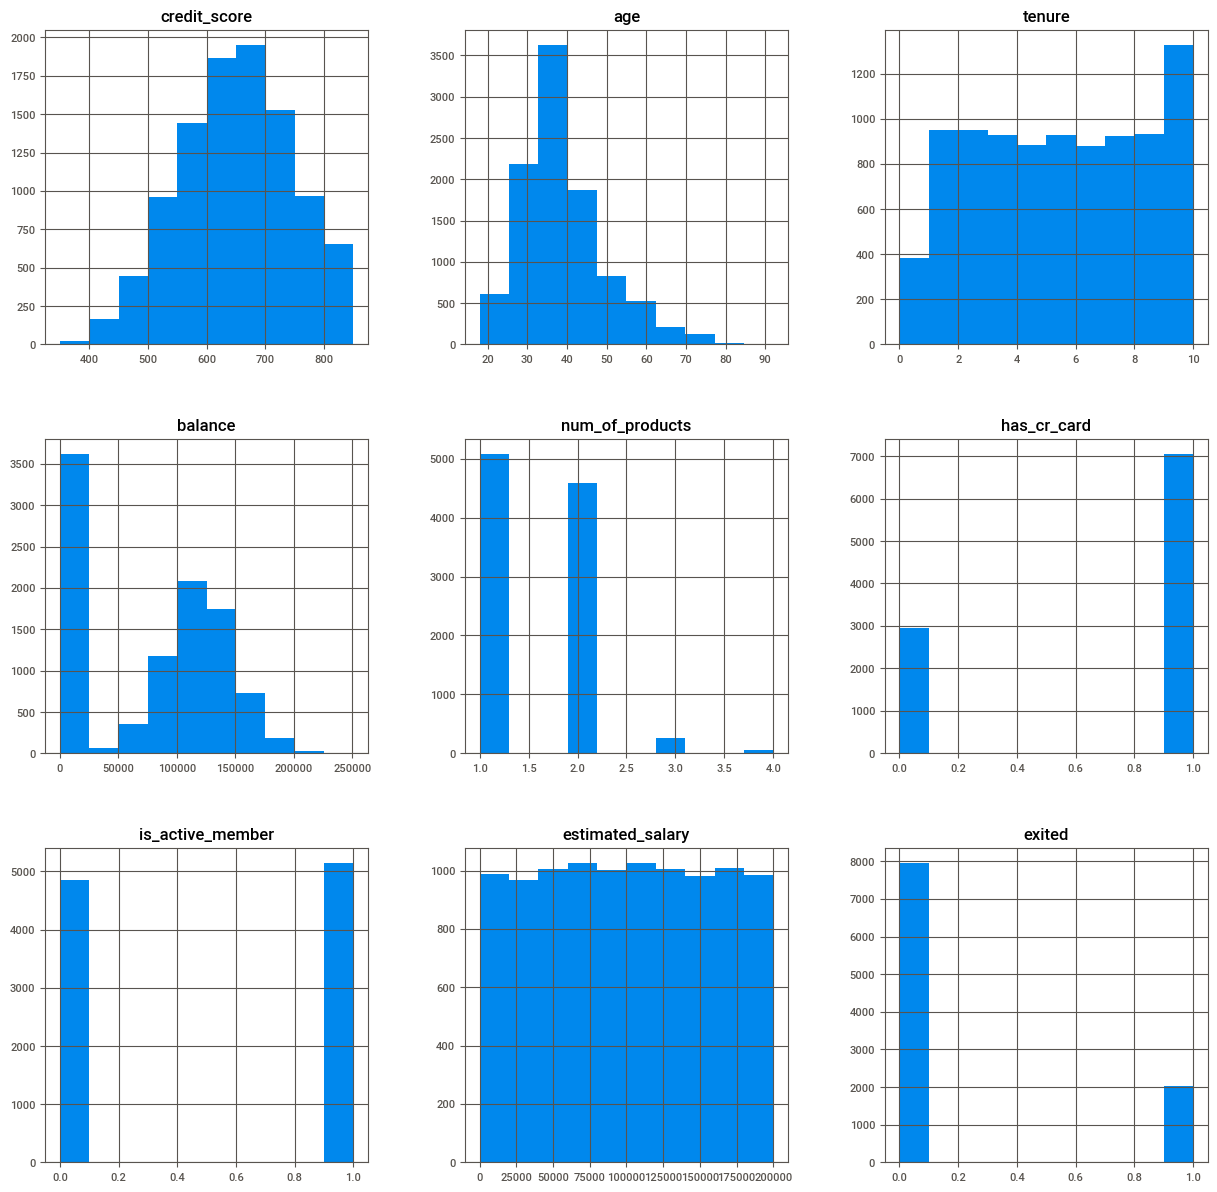

In [190]:
df[num_list].hist(figsize=(15,15))

Анализ пропусков в переменной клиентского стажа:

In [191]:
df[df['tenure'].isna()].sample(10)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
9822,9823,15781298,Hughes,808,Germany,Male,39,NaN,124216.93,1,0,1,171442.36,0
1628,1629,15810347,Todd,662,Spain,Female,30,NaN,0.00,2,0,1,157884.83,0
2317,2318,15627212,Smith,630,France,Female,36,NaN,110414.48,1,1,1,48984.95,0
2121,2122,15583576,Tai,671,France,Male,30,NaN,0.00,1,0,1,102057.86,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
8199,8200,15798532,Crawford,810,France,Male,32,NaN,120879.73,2,0,1,78896.59,0
6026,6027,15718843,Maslova,769,Spain,Male,41,NaN,72509.91,1,1,0,25723.73,0
217,218,15786308,Millar,730,Spain,Female,33,NaN,0.00,2,0,0,176576.62,0
942,943,15804586,Lin,376,France,Female,46,NaN,0.00,1,1,0,157333.69,1
5689,5690,15612931,Korovin,722,Spain,Female,50,NaN,132088.59,1,1,1,128262.14,0


Распределение по переменной баланса фактически близки к дамми переменной, поэтому переделаем ее в такой вид. Хотя из-за этого мы теряем часть данных, но переменная станет лучше обрабатываться моделями:

In [192]:
df['balance'] = df['balance']>0
df['balance'] = df['balance'].astype('int64')

Нет четкой связи пропусков с другими признаками. Заменяем стаж на случайную величину между 0 и 10, так как в целом распределение этого признака близко к равномерному распределению:

In [193]:
for i in df[df['tenure'].isna()].index:
    df.loc[i,'tenure'] = random.randint(0,10)
#df[df['tenure']==np.nan]['tenure'] = df[df['tenure']==np.nan]['tenure'].apply(lambda v: random.choice(df[df['tenure']!=np.nan]['tenure'], random_state=12345, implace=True))

#df['tenure'].fillna(lambda x: random.choice(df[df['tenure']!=np.nan]['tenure'], random_state=12345), inplace=True)
#df['tenure'] = df['tenure'].fillna(df['tenure'].mean())

Анализ категориальных признаков и их перевод в дамми признаки:

In [194]:
df['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [195]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [196]:
df_geography = pd.get_dummies(df['geography'], drop_first=True)
df_gender = pd.get_dummies(df['gender'], drop_first=True)
df = df.join(df_geography).join(df_gender).drop(['geography', 'gender'], axis=1)
df = df.rename(columns={'Germany':'germany', 'Spain':'spain', 'Male':'male'})

Удаляем переменные, которые точно не являются предикторами оттока клиентов (индекс, уникальный номер клиента, его фамилия):

In [197]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

Обзор данных после всех изменений:

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  float64
 3   balance           10000 non-null  int64  
 4   num_of_products   10000 non-null  int64  
 5   has_cr_card       10000 non-null  int64  
 6   is_active_member  10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   exited            10000 non-null  int64  
 9   germany           10000 non-null  uint8  
 10  spain             10000 non-null  uint8  
 11  male              10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [199]:
df.sample(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,germany,spain,male
2656,779,34,5.0,0,2,0,1,111676.63,0,0,1,0
7252,567,40,7.0,1,1,1,0,138552.74,0,1,0,1
7854,746,49,7.0,0,2,0,1,10096.25,0,0,1,1
2489,714,28,6.0,1,1,1,1,67057.27,0,0,0,1
9108,772,41,10.0,1,1,1,1,75825.57,0,0,1,1
899,657,25,6.0,1,1,1,0,22745.50,0,1,0,1
5529,691,34,8.0,1,2,1,0,91359.79,0,0,0,1
1374,632,44,3.0,1,1,1,0,185667.72,0,0,0,1
2756,492,29,1.0,1,1,1,1,196293.76,0,0,0,1
9477,655,41,5.0,0,1,0,0,36548.00,1,0,0,0


Проведем дескриптивный анализ с помощью инструмента sweetviz:

                                             |                                                                …


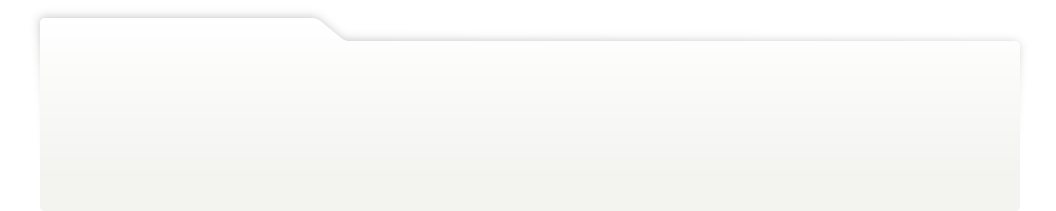
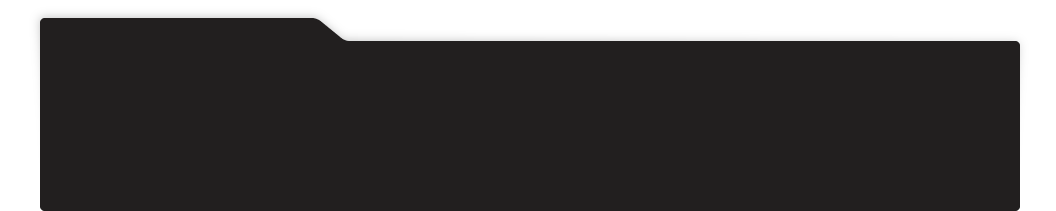
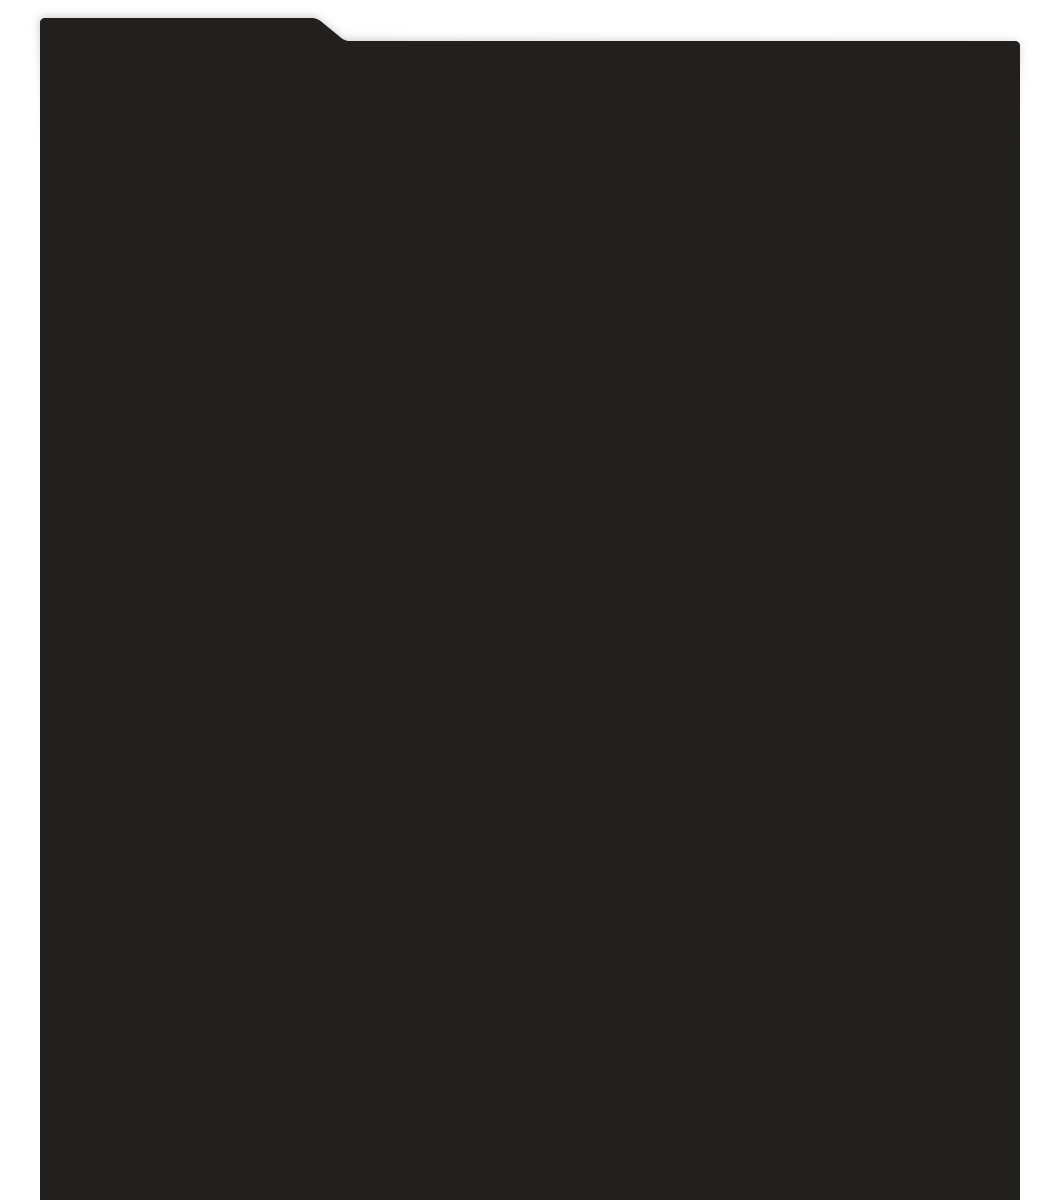
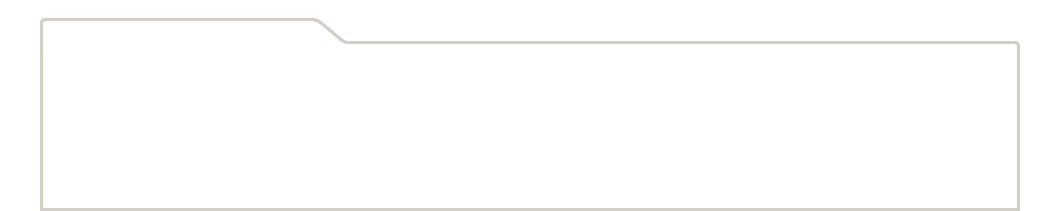
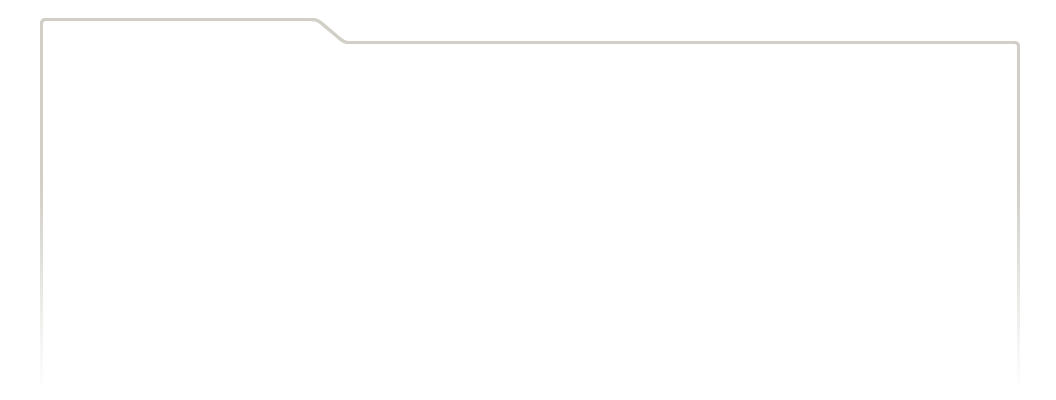
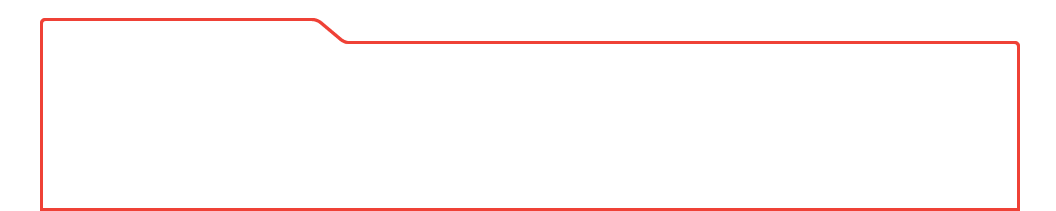
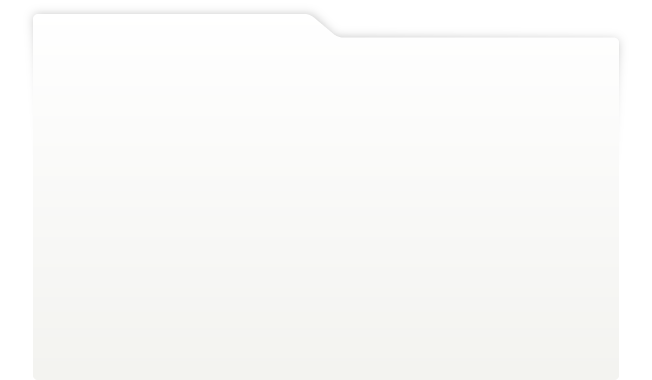
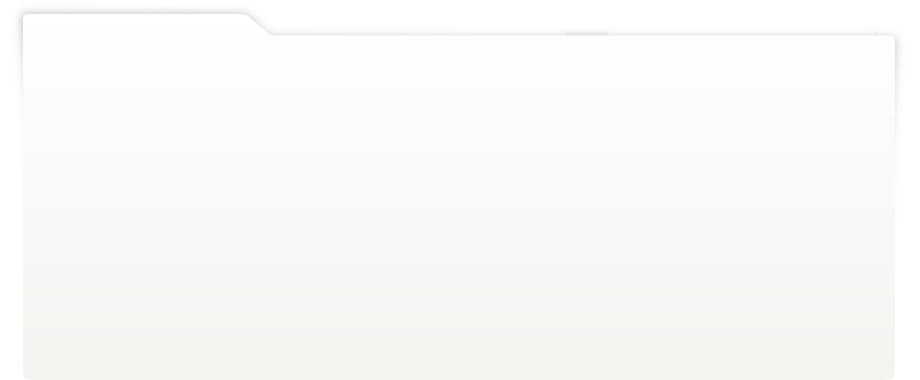
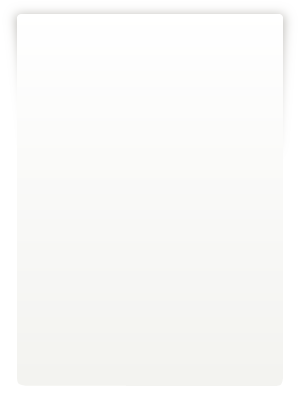
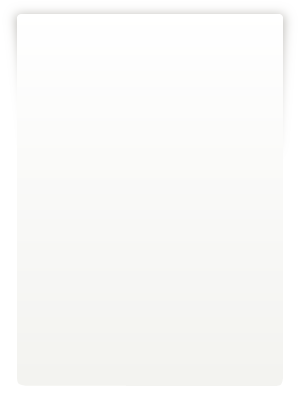
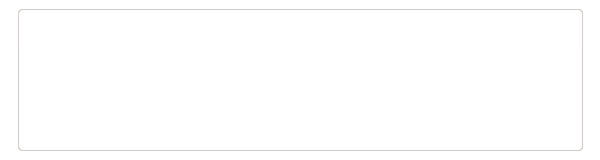
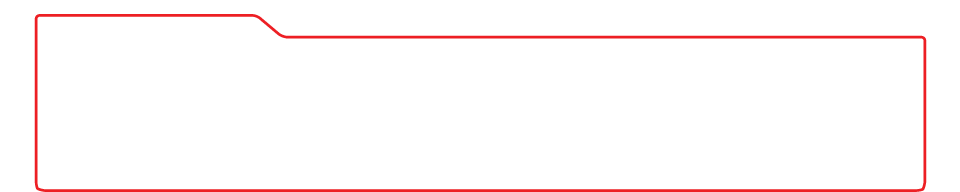
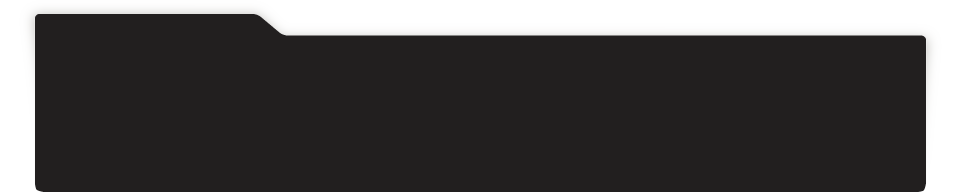
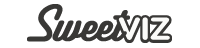
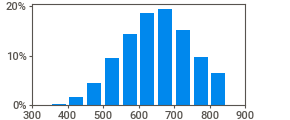
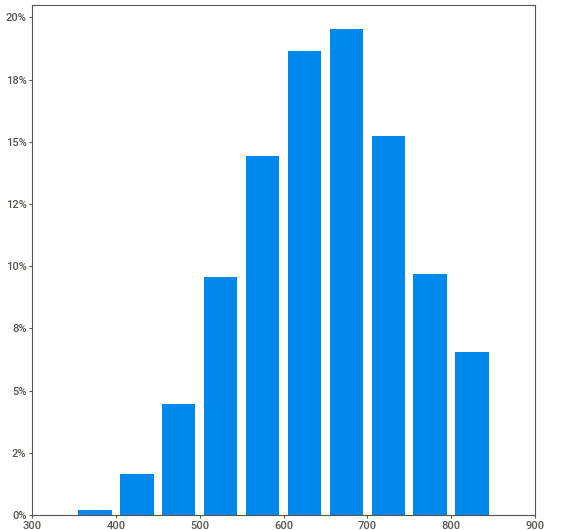
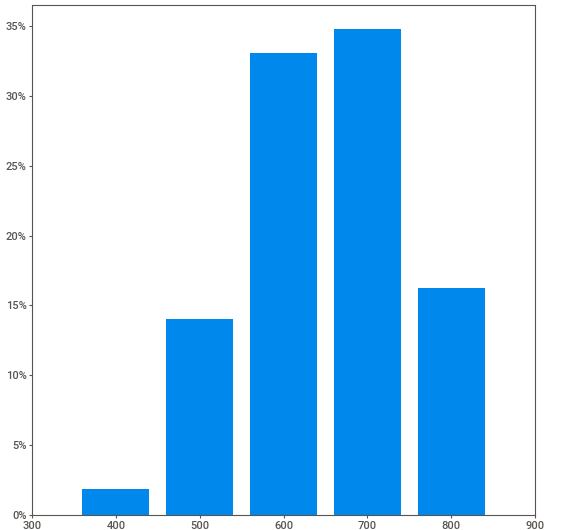
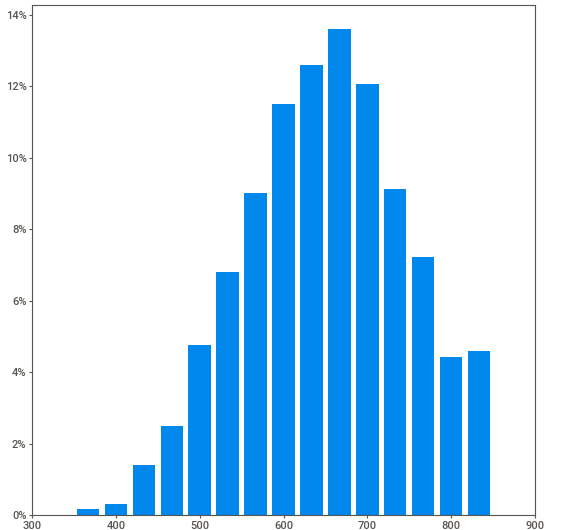
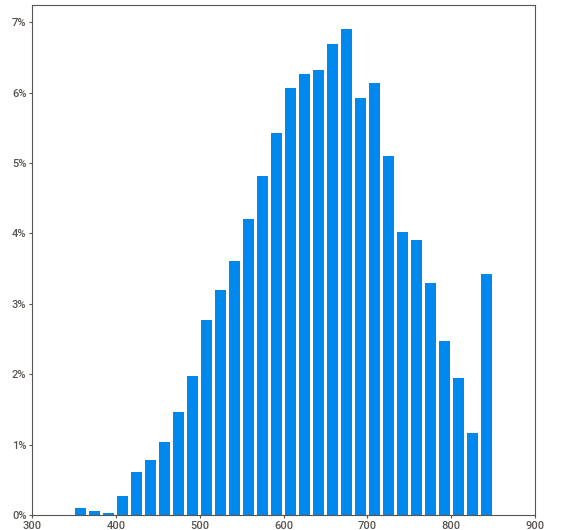
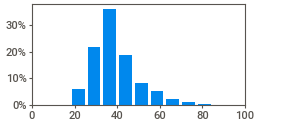
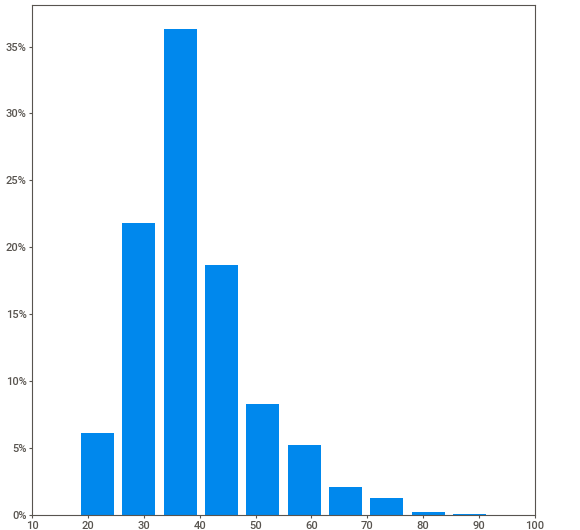
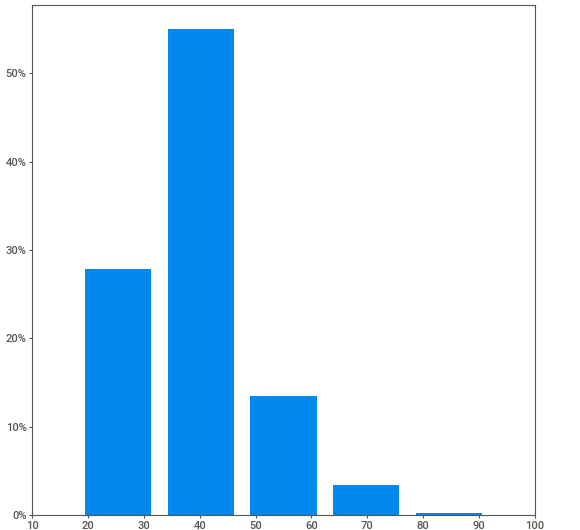
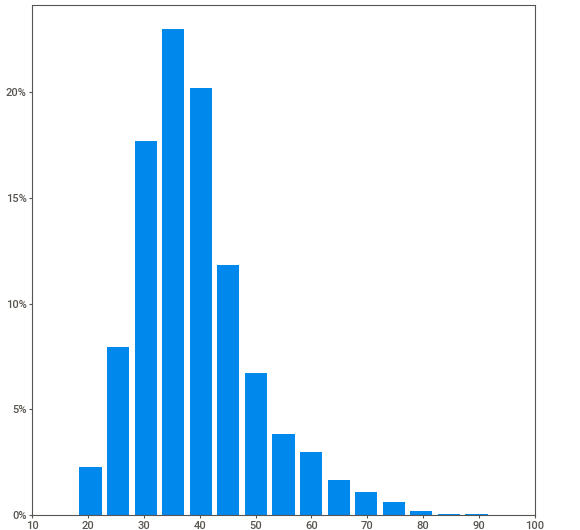
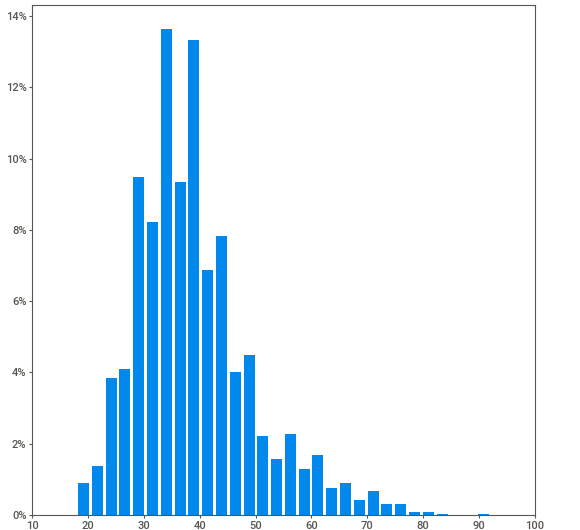
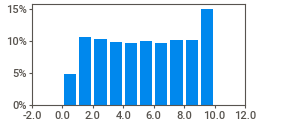
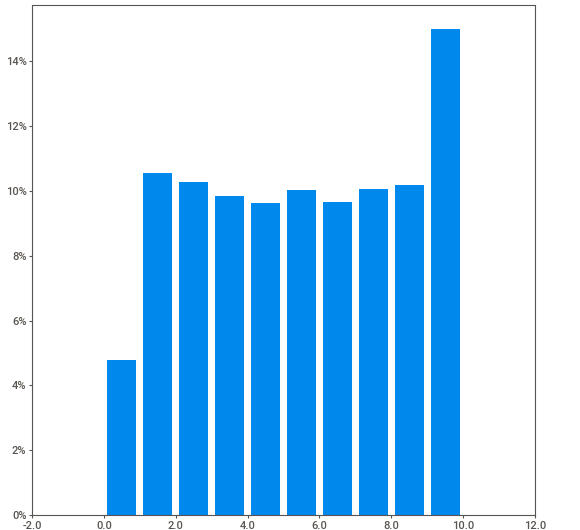
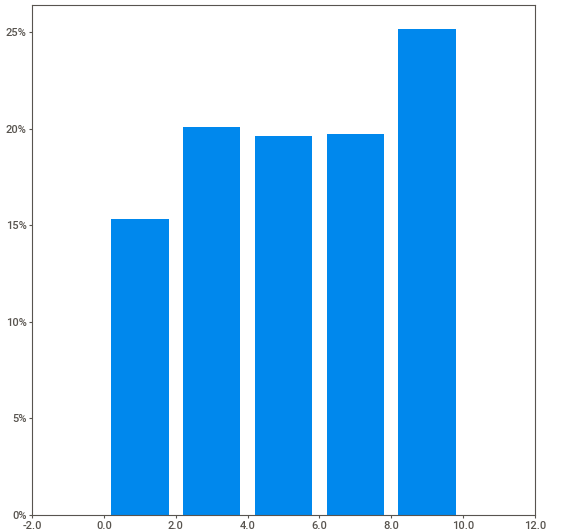
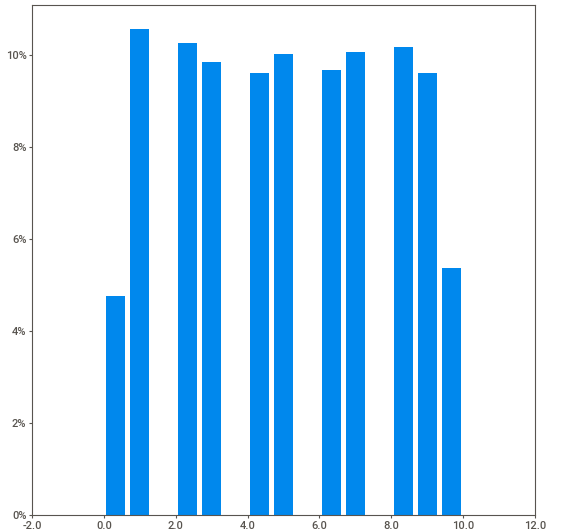
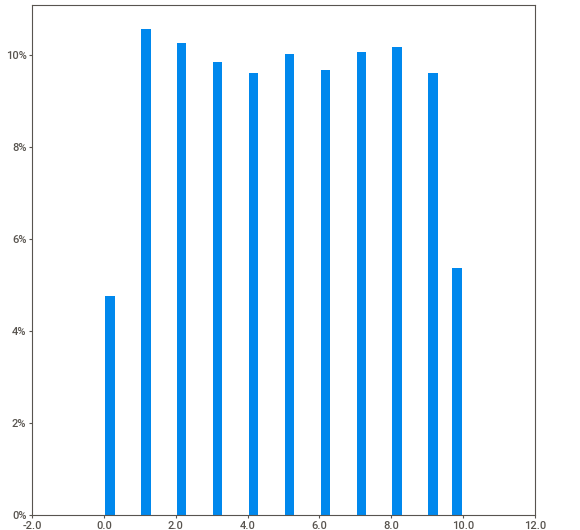
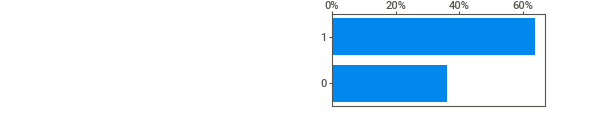
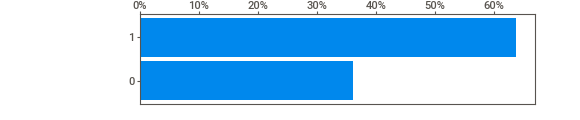
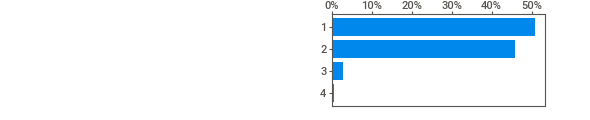
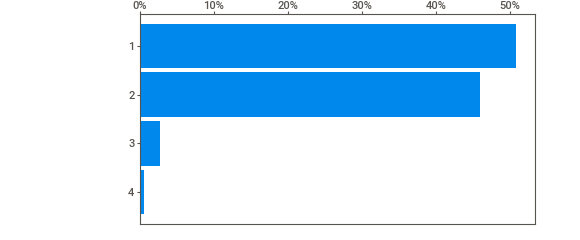
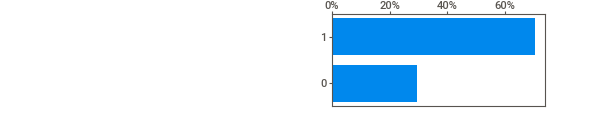
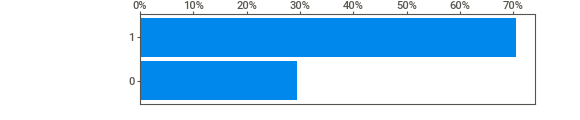
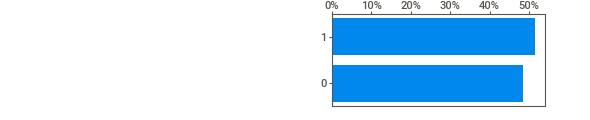
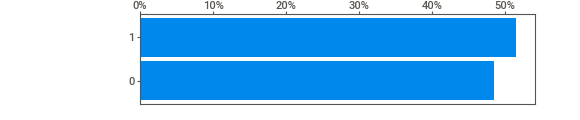
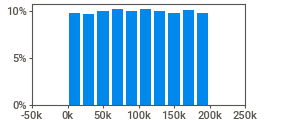
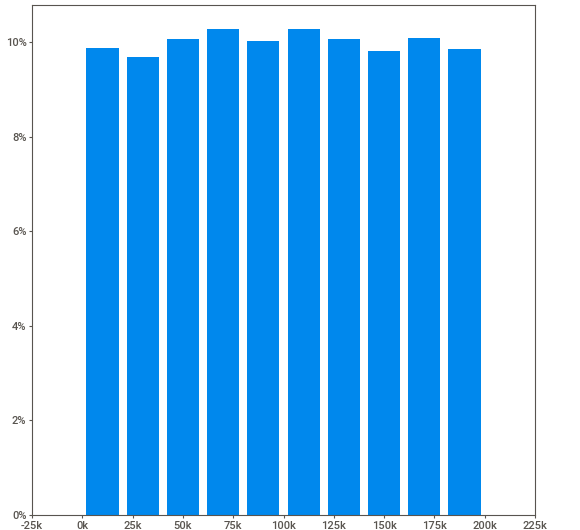
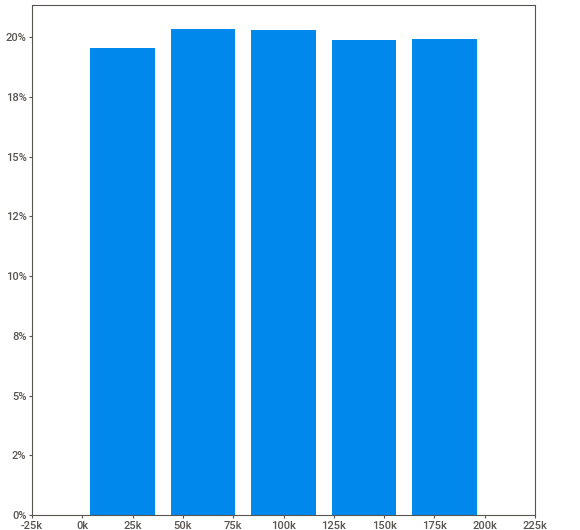
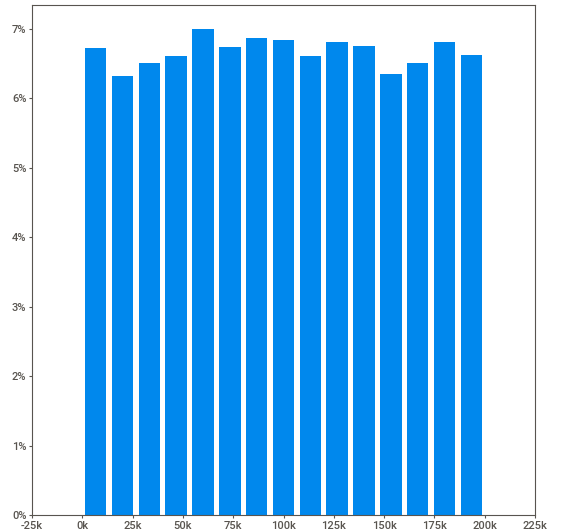
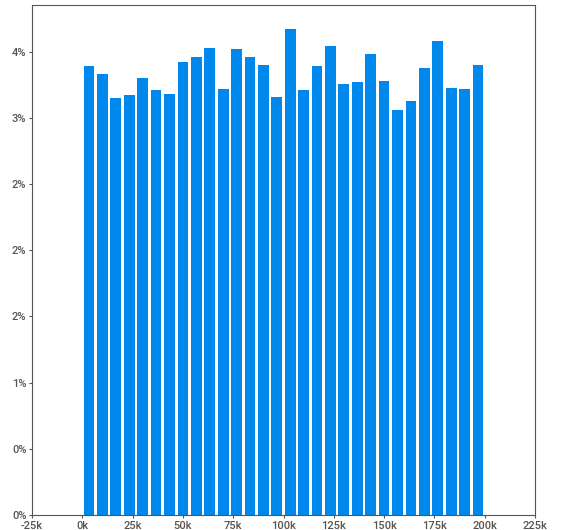
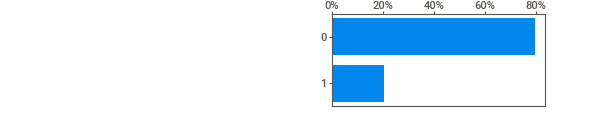
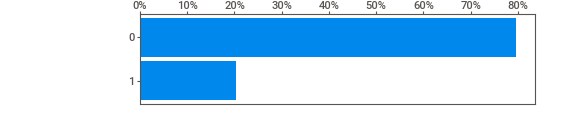
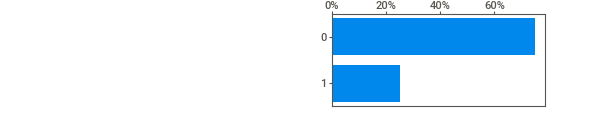
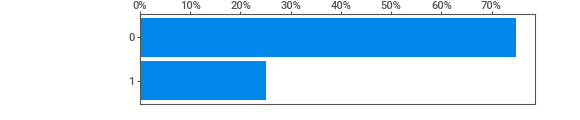
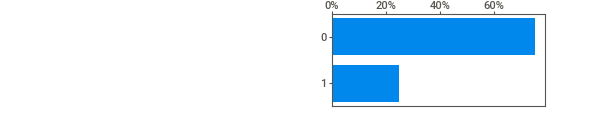
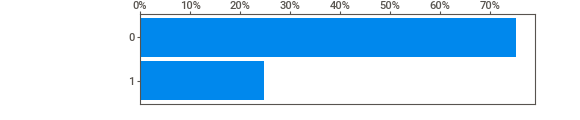
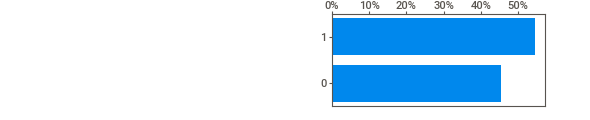
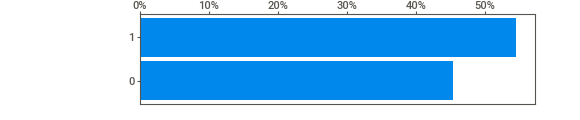
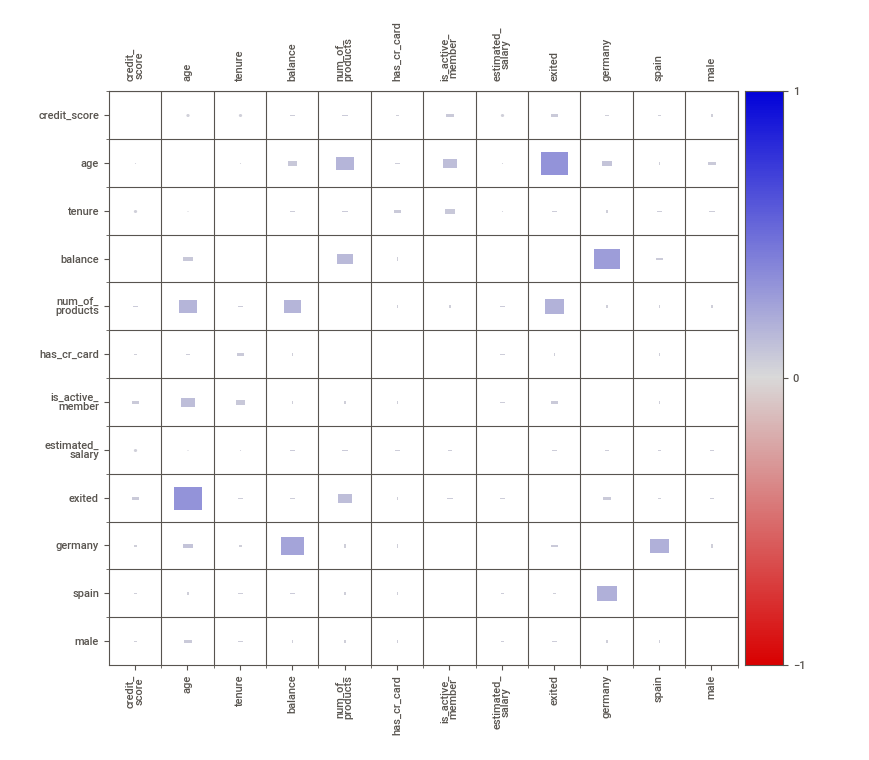
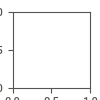

In [200]:
my_report = sv.analyze(df)
my_report.show_notebook(layout='vertical')

Готовим отдельные подвыборки для дальнейшего исследования:

In [201]:
features = df.drop('exited', axis=1)
target = df['exited']

In [202]:
features_train_valid, features_tested, target_train_valid, target_tested = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid, test_size=0.25, random_state=12345)


Масштабируем количественные признаки:

/Users/victorlyashok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/victorlyashok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/victorlyashok/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

array([[<AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'estimated_salary'}>]], dtype=object)

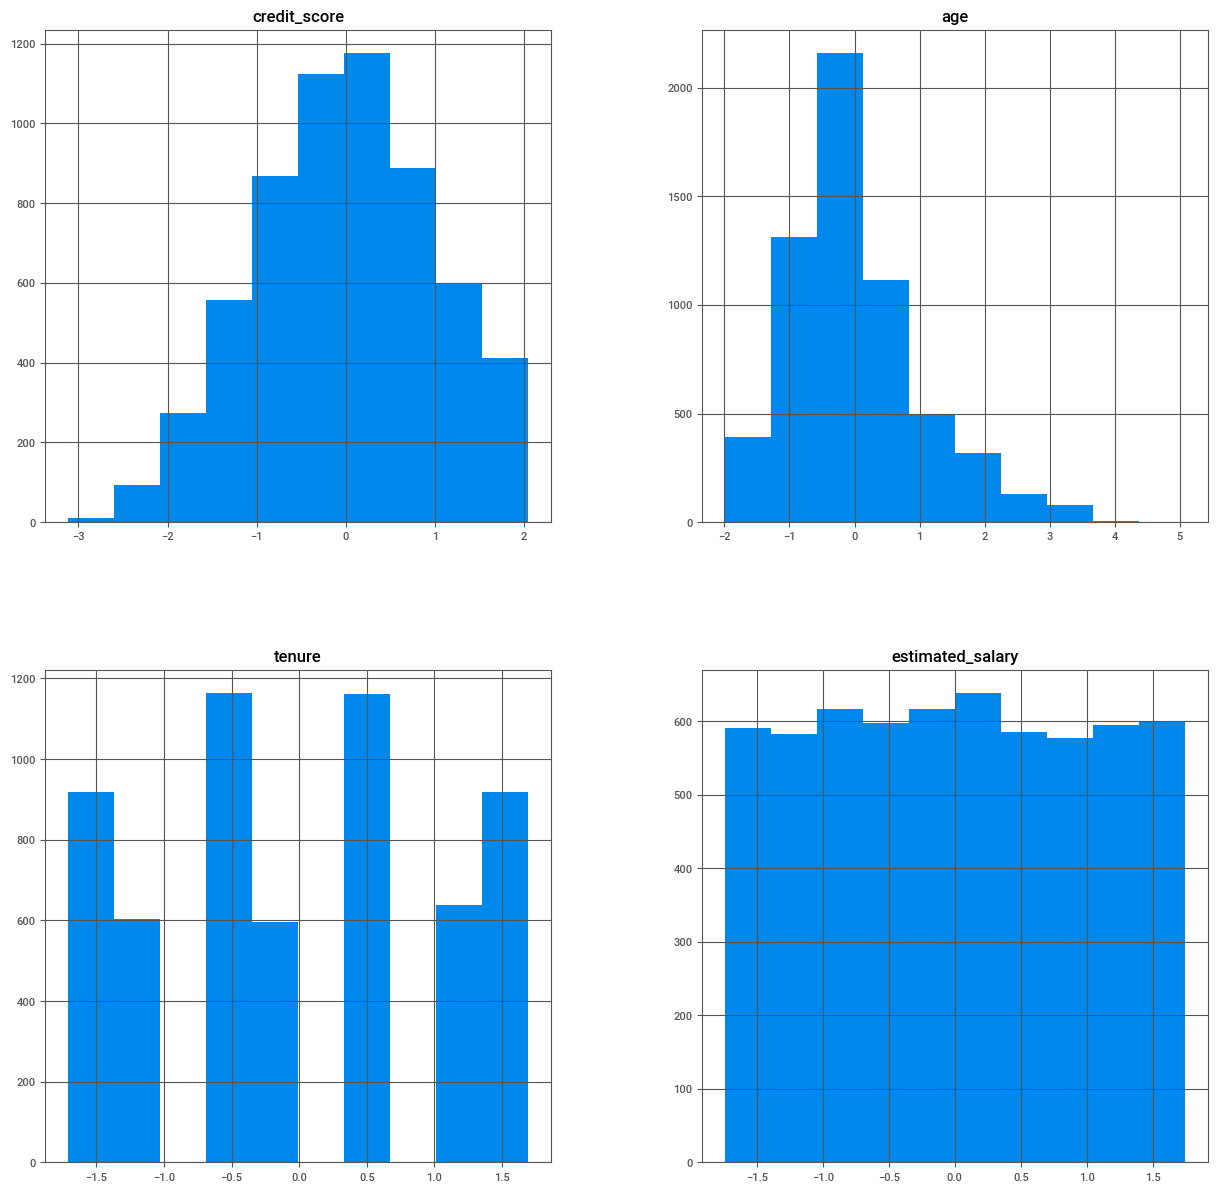

In [203]:
scaler = StandardScaler()
num_list2 = ['credit_score', 'age', 'tenure', 'estimated_salary']
scaler.fit(features_train[num_list2])
features_train[num_list2] = scaler.transform(features_train[num_list2])
features_valid[num_list2] = scaler.transform(features_valid[num_list2])
features_tested[num_list2] = scaler.transform(features_tested[num_list2])
features_train_valid[num_list2] = scaler.transform(features_train_valid[num_list2])
features_train[num_list2].hist(figsize=(15,15))

**Выводы:** Преобразовали данные, подготовили подвыборки.

## Исследование задачи

Выборка несбалансирована, только около 20% всех объектов отражают факт ухода из банка, в 80% индивиды остаются. Тем не менее, на первом этапе исследования будем предсказывать на основании несбалансированной выборки, используя два метода (логистическая регрессия и случайный лес):

Логистическая регрессия:

In [204]:
model_disbal_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_disbal_lr.fit(features_train, target_train)
predictions_disbal_lr = model_disbal_lr.predict(features_valid)

In [205]:
print(f1_score(target_valid, predictions_disbal_lr))
probabilities_valid = model_disbal_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

0.31028037383177565
0.7728982911023191


Случайный лес (с подборкой различных гиперпараметров через GridSearchCV):

In [206]:
parametrs = {'n_estimators': range (30, 101, 10), 'max_depth': range (5, 36, 5)}

In [207]:
model_disbal_forest = RandomForestClassifier(random_state=12345)
grid_disbal_forest = GridSearchCV(model_disbal_forest, parametrs, scoring='f1', cv=5)
grid_disbal_forest.fit(features_train_valid, target_train_valid)
grid_disbal_forest.best_params_

{'max_depth': 10, 'n_estimators': 40}

In [208]:
model_disbal_forest = RandomForestClassifier(
    max_depth=grid_disbal_forest.best_params_['max_depth'], 
    n_estimators=grid_disbal_forest.best_params_['n_estimators'], 
    random_state=12345)
model_disbal_forest.fit(features_train, target_train)
predictions_disbal_forest = model_disbal_forest.predict(features_valid)

In [209]:
print(f1_score(target_valid, predictions_disbal_forest))
probabilities_valid = model_disbal_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

0.530278232405892
0.849829682460711


**Выводы:** Оценка метрик ниже требуемого для выполнения задания, что в том числе связано с несбалансированностью данных. AUC-ROC при этом относительно высока.

## Борьба с дисбалансом

Используем несколько методов борьбы: взвешивание выборки, увеличение выборки (размер выборки не столь большой, чтобы эффективно использовать методы ее уменьшения): 

### Взвешивание выборки
#### Логистическая регрессия

In [210]:
model_weighted_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_weighted_lr.fit(features_train, target_train)
predictions_weighted_lr = model_weighted_lr.predict(features_valid)

In [211]:
print(f1_score(target_valid, predictions_weighted_lr))
probabilities_valid = model_weighted_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

0.4813499111900532
0.7753572853466514


Взвешивение значительно увеличило показатель f1 для логистической регрессии, но он все равно ниже, чем при использовании модели случайного леса.

#### Случайный лес

In [212]:
model_weighted_forest = RandomForestClassifier(random_state=12345, class_weight='balanced')
grid_weighted_forest = GridSearchCV(model_weighted_forest, parametrs, cv=5)
grid_weighted_forest.fit(features_train_valid, target_train_valid)
grid_weighted_forest.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [213]:
model_weighted_forest = RandomForestClassifier(
    max_depth=grid_weighted_forest.best_params_['max_depth'], 
    n_estimators=grid_weighted_forest.best_params_['n_estimators'],
    class_weight='balanced',
    random_state=12345)
model_weighted_forest.fit(features_train, target_train)
predictions_weighted_forest = model_weighted_forest.predict(features_valid)

In [214]:
print(f1_score(target_valid, predictions_weighted_forest))
probabilities_valid = model_weighted_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

0.5475409836065573
0.8342102209597866


Взвешивание не изменило качество модели случайного леса. Все метрики остались практически неизменными.

### Увеличение выборки

Созданием функцию upsampling:

In [215]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

#### Логистическая регрессия

In [216]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [217]:
model_upsampled_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_upsampled_lr.fit(features_upsampled, target_upsampled)
predictions_upsampled_lr = model_upsampled_lr.predict(features_valid)

In [218]:
print(f1_score(target_valid, predictions_upsampled_lr))
probabilities_valid = model_upsampled_lr.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

0.48070175438596485
0.775406560603002


Увеличеие размера выборки также позвитивно влияет на метрику f1, как и при взвешивании.

#### Случайный лес

In [219]:
features_upsampled, target_upsampled = upsample(features_train_valid, target_train_valid, 4)

In [220]:
model_upsampled_forest = RandomForestClassifier(random_state=12345)
grid_upsampled_forest = GridSearchCV(model_upsampled_forest, parametrs, scoring='f1', cv=5)
grid_upsampled_forest.fit(features_upsampled, target_upsampled)
grid_upsampled_forest.best_params_

{'max_depth': 30, 'n_estimators': 90}

In [221]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
features_upsampled_val, target_upsampled_val = upsample(features_valid, target_valid, 4)

In [222]:
model_upsampled_forest = RandomForestClassifier(
    max_depth=grid_upsampled_forest.best_params_['max_depth'], 
    n_estimators=grid_upsampled_forest.best_params_['n_estimators'],
    random_state=12345)
model_upsampled_forest.fit(features_upsampled, target_upsampled)
predictions_upsampled_forest = model_upsampled_forest.predict(features_upsampled_val)

In [223]:
print(f1_score(target_upsampled_val, predictions_upsampled_forest))
probabilities_valid = model_upsampled_forest.predict_proba(features_upsampled_val)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_upsampled_val, probabilities_one_valid))

0.6456252497003595
0.8356892734125023


В отличие от взвешивания, увеличение выборки позволило увеличить f1 выше 0,59. Показатель AUC-ROC остается неизменным.

## Тестирование модели

Тестируем лучшую модель (случайный лес с увеличением выборки, максимальной глубиной 25 и количеством деревьев 80) на тестовых данных:

In [224]:
predictions_upsampled_forest = model_upsampled_forest.predict(features_tested)

In [225]:
print(f1_score(target_tested, predictions_upsampled_forest))
probabilities_tested = model_upsampled_forest.predict_proba(features_tested)
probabilities_one_tested = probabilities_tested[:, 1]
print(roc_auc_score(target_tested, probabilities_one_tested))

0.5802310654685494
0.8398769635729396


**Выводы:** Метрики модели ухудшились, что говорит о некотором переобучении модели. Тем не менее, f1 выше 0,59. Значение AUC-ROC на уровне 0,83 показывает, что используемая модель лучше случайной модели.

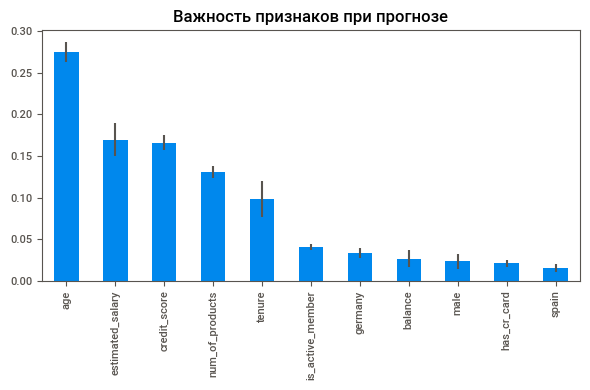

In [226]:
importances = model_upsampled_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_upsampled_forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=features_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Важность признаков при прогнозе")
fig.tight_layout()

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

Ссылка на репозиторий: https://github.com/victor-lyashok/training_with_teacher